# Estadística para Ciencia de los Datos
# Tarea #2
## Estudiantes
- Roberto Baltodano
- Sergio Blanco

En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto.

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 28 de Enero a las 11:00PM un notebook de colab con la solución a los siguientes ejercicios:

1. Elija alguna variable **cuantitativa** del set de datos y:
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

2. Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 1 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)

3. Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta





In [30]:
%%capture
# Correr esto solo una vez en su .venv
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scipy
%pip install torch

## Respuesta Pregunta 1
Se analizará la variable `price`

In [31]:
# Carga del dataset
import pandas as pd

print("Cargando dataset de diamantes...")
diamonds_data = pd.read_csv("diamonds.csv")

print("\nPrimeras 5 filas del dataset:")
diamonds_data.head()

Cargando dataset de diamantes...

Primeras 5 filas del dataset:


,carat,depth,table,price,x,y,z,cut
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1


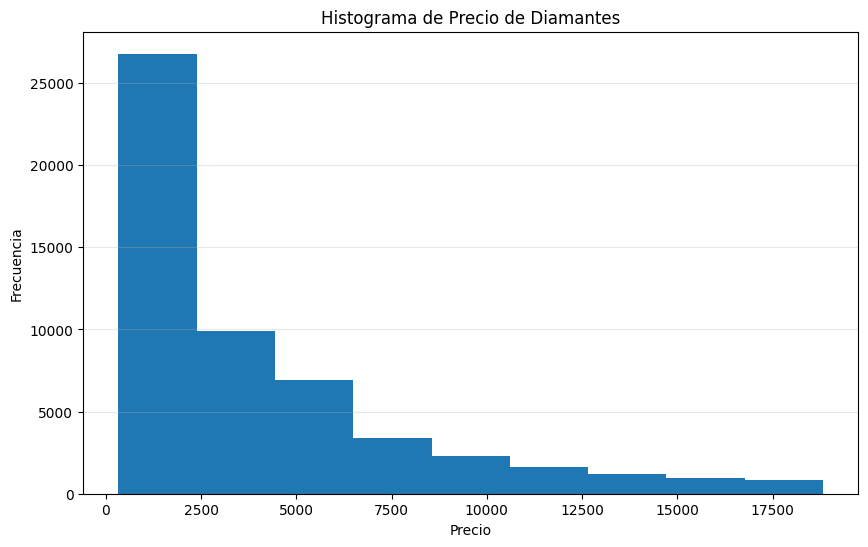

In [32]:
# Muestra histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['price'], bins=9)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precio de Diamantes')
plt.grid(axis='y', alpha=0.3)
plt.show()

Como podemos observar, el histograma de los precios de los diamantes tiene mayor ocurrencia al lado izquierdo (eje Y) y conforme aumenta X, las frecuencias disminuyen. Coincide totalmente con la distribución Gamma vista en clase. Se escogerá esta distribución y se ajustará alfa y beta.

Parámetros Gamma: shape (α) = 0.8541, scale (β) = 4293.0865


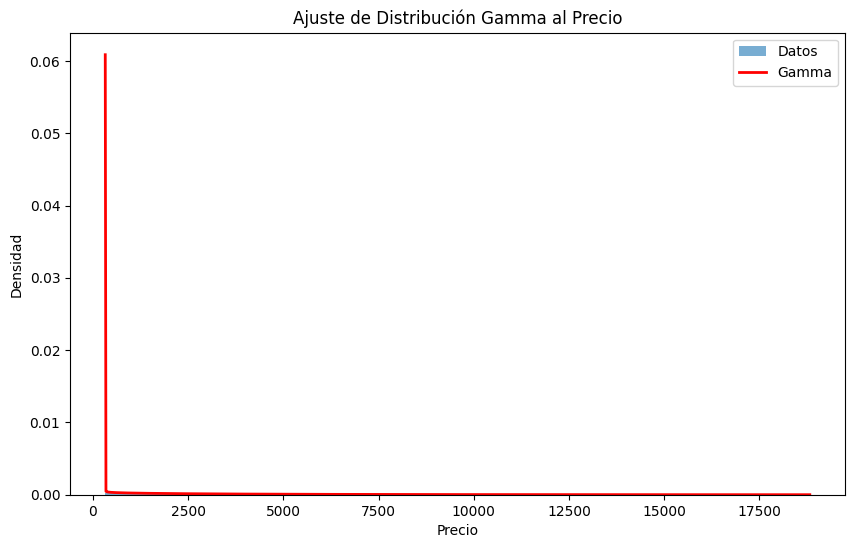

In [33]:
from scipy import stats
import numpy as np

shape, loc, scale = stats.gamma.fit(diamonds_data['price'])
print(f'Parámetros Gamma: shape (α) = {shape:.4f}, scale (β) = {scale:.4f}')

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['price'], bins=9, density=True, alpha=0.6, label='Datos')

x = np.linspace(diamonds_data['price'].min(), diamonds_data['price'].max(), 1000)
plt.plot(x, stats.gamma.pdf(x, shape, loc, scale), 'r-', linewidth=2, label='Gamma')

plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribución Gamma al Precio')
plt.legend()
plt.show()

Los parametros se ajustaron usando la función `stats.gamma.fit` pasando los datos de la columna `price`. Según Google Gemini: "se ajustan usando el MLE (Maximum Likelihood Estimation)" y como se observa en el gráfico anterior, se ajustan bien a los datos de la columa de precio.

## Respuesta Pregunta 2
### Columna 1
Se analizará la variable `carat`

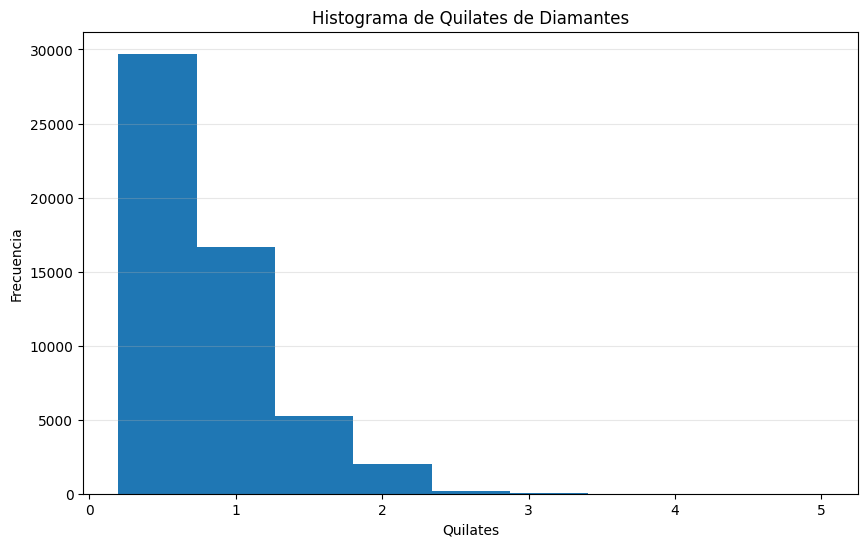

In [34]:
# Muestra histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['carat'], bins=9)
plt.xlabel('Quilates')
plt.ylabel('Frecuencia')
plt.title('Histograma de Quilates de Diamantes')
plt.grid(axis='y', alpha=0.3)
plt.show()

Al igual que con la columna `price`, el histograma de los quilates de los diamantes tiene mayor ocurrencia al lado izquierdo (eje Y). Se escogerá nuevamente la distribución gamma y se seguirá el ajuste que se obtiene de `stats.gamma.fit`

Parámetros Gamma: shape (α) = 1.5010, scale (β) = 0.3985


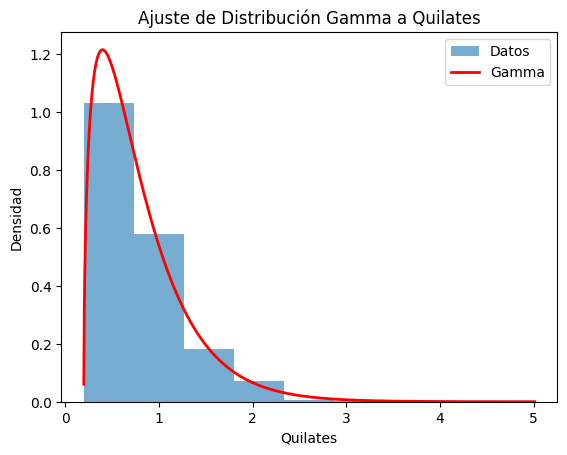

In [35]:
from scipy import stats
import numpy as np

shape, loc, scale = stats.gamma.fit(diamonds_data['carat'])
print(f'Parámetros Gamma: shape (α) = {shape:.4f}, scale (β) = {scale:.4f}')

plt.hist(diamonds_data['carat'], bins=9, density=True, alpha=0.6, label='Datos')

x = np.linspace(diamonds_data['carat'].min(), diamonds_data['carat'].max(), 1000)
plt.plot(x, stats.gamma.pdf(x, shape, loc, scale), 'r-', linewidth=2, label='Gamma')

plt.xlabel('Quilates')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribución Gamma a Quilates')
plt.legend()
plt.show()

### Columna 2
Se analizará la variable `depth`

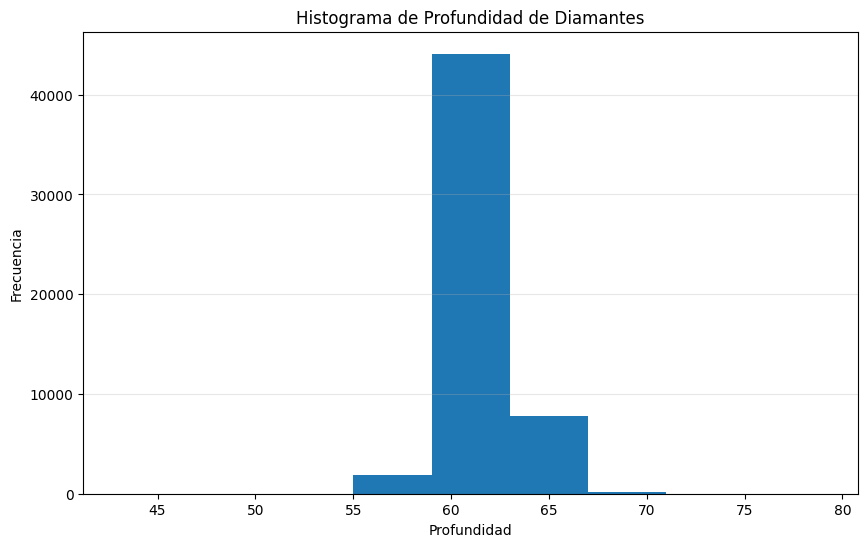

In [36]:
# Muestra histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['depth'], bins=9)
plt.xlabel('Profundidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Profundidad de Diamantes')
plt.grid(axis='y', alpha=0.3)
plt.show()

Se escogerá la distribución normal ya que ocurre lo siguiente:
- Los datos se concentran alrededor de un valor central (la media)
- La distribución es simétrica
- Los valores extremos son menos frecuentes

Parámetros Normal: μ (media) = 61.7494, σ (desviación estándar) = 1.4326


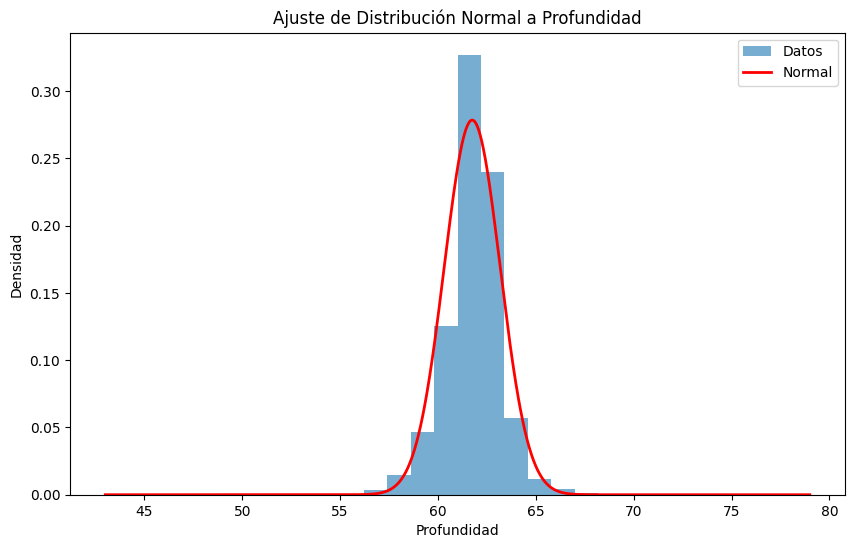

In [37]:
from scipy import stats
import numpy as np

mu, sigma = stats.norm.fit(diamonds_data['depth'])
print(f'Parámetros Normal: μ (media) = {mu:.4f}, σ (desviación estándar) = {sigma:.4f}')

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['depth'], bins=30, density=True, alpha=0.6, label='Datos')

x = np.linspace(diamonds_data['depth'].min(), diamonds_data['depth'].max(), 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')

plt.xlabel('Profundidad')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribución Normal a Profundidad')
plt.legend()
plt.show()

### Columna 3
Se analizará la variable `table`

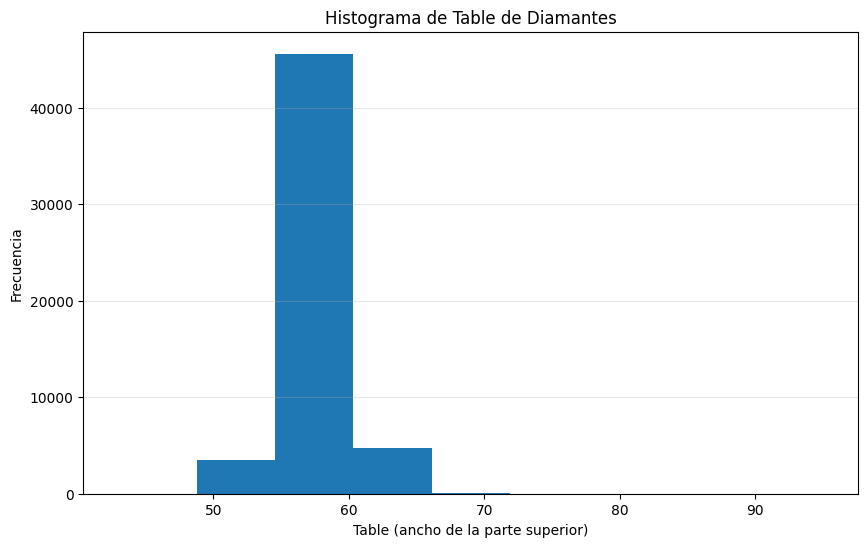

In [38]:
# Muestra histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['table'], bins=9)
plt.xlabel('Table (ancho de la parte superior)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Table de Diamantes')
plt.grid(axis='y', alpha=0.3)
plt.show()

Al igual que la columna anterior `depth`, ocurre lo siguiente con `table`:
- Los datos se concentran alrededor de un valor central (la media)
- La distribución es simétrica
- Los valores extremos son menos frecuentes

Parámetros Normal: μ (media) = 57.4572, σ (desviación estándar) = 2.2345


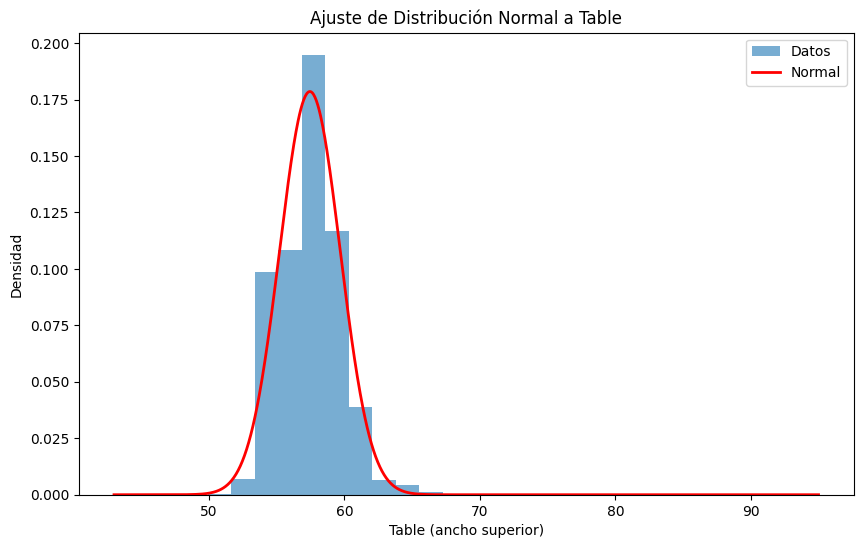

In [39]:
from scipy import stats
import numpy as np

mu, sigma = stats.norm.fit(diamonds_data['table'])
print(f'Parámetros Normal: μ (media) = {mu:.4f}, σ (desviación estándar) = {sigma:.4f}')

plt.figure(figsize=(10, 6))
plt.hist(diamonds_data['table'], bins=30, density=True, alpha=0.6, label='Datos')

x = np.linspace(diamonds_data['table'].min(), diamonds_data['table'].max(), 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')

plt.xlabel('Table (ancho superior)')
plt.ylabel('Densidad')
plt.title('Ajuste de Distribución Normal a Table')
plt.legend()
plt.show()

## Respuesta Pregunta 2
Se analizará la prueba de distribución KS para las distribuciones propuestas para alpha = 0.05

### Columna `price` -> Distribución propuesta: Gamma -> shape (α) = 0.8541, scale (β) = 4293.0865

In [40]:
import torch
from torch.distributions import Gamma
from torch.distributions.exp_family import ExponentialFamily
import numpy as np
import matplotlib.pyplot as plt

#Ocurrences
bins = 9
npHistogram, bin_edges = np.histogram(diamonds_data['price'].values, bins=bins)
histogram = torch.tensor(npHistogram)

#values
histogramX = torch.tensor([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(bins)])

#number of observations
n = npHistogram.sum()
histogramNorm = histogram / n        #Norm factor for mean
histogramNorm2 = histogram / (n - 1) #Norm factor for std

#calculate cumulative sum
cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

#get sample stats
meanHist = (histogramX * histogramNorm).sum()
stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())

# Create ideal CDF (gamma distribution)
gammaDensity = Gamma(0.8541, 4293.0865)
cdfGammaIdeal = gammaDensity.cdf(histogramX) # points used to evaluate cdf

# Compare the empirical and ideal distributions
difference = torch.abs(cdfGammaIdeal - cdfEmpirical)
dn = torch.max(difference)

print(1.3581 / np.sqrt(n)) #valor critico. Se escoge 1.3581 por la tabla de densidad de KS (n > 50)
print(n)
print(cdfGammaIdeal)
print(cdfEmpirical)
print(dn)


0.005847581428682486
53940
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([0.4964, 0.6802, 0.8081, 0.8715, 0.9137, 0.9443, 0.9670, 0.9848, 1.0000])
tensor(0.5036, dtype=torch.float64)


#### Analisis de resultados

El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.5036 > 0.0058$.

Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{h}$ ha sido generado de una distribución gamma, se  rechaza. En caso de que el valor $D$ hubiese sido menor se asume como cierta o en otras palabras, no se tendría la suficiente evidencia como para demostrar lo contrario.

### Columna `carat` -> Distribución propuesta: Gamma -> (α) = 1.5010, scale (β) = 0.3985

In [41]:
import torch
from torch.distributions import Gamma
from torch.distributions.exp_family import ExponentialFamily
import numpy as np
import matplotlib.pyplot as plt

#Ocurrences
bins = 9
npHistogram, bin_edges = np.histogram(diamonds_data['carat'].values, bins=bins)
histogram = torch.tensor(npHistogram)

#values
histogramX = torch.tensor([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(bins)])

#number of observations
n = npHistogram.sum()
histogramNorm = histogram / n        #Norm factor for mean
histogramNorm2 = histogram / (n - 1) #Norm factor for std

#calculate cumulative sum
cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

#get sample stats
meanHist = (histogramX * histogramNorm).sum()
stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())

# Create ideal CDF (gamma distribution)
gammaDensity = Gamma(1.5010, 0.3985)
cdfGammaIdeal = gammaDensity.cdf(histogramX) # points used to evaluate cdf

# Compare the empirical and ideal distributions
difference = torch.abs(cdfGammaIdeal - cdfEmpirical)
dn = torch.max(difference)

print(1.3581 / np.sqrt(n)) #valor critico. Se escoge 1.3581 por la tabla de densidad de KS (n > 50)
print(n)
print(cdfGammaIdeal)
print(cdfEmpirical)
print(dn)


0.005847581428682486
53940
tensor([0.0540, 0.1499, 0.2525, 0.3516, 0.4429, 0.5247, 0.5968, 0.6595, 0.7135],
       dtype=torch.float64)
tensor([0.5508, 0.8603, 0.9578, 0.9955, 0.9993, 0.9998, 0.9999, 1.0000, 1.0000])
tensor(0.7104, dtype=torch.float64)


#### Analisis de resultados

El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.7104 > 0.0058$.

Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{h}$ ha sido generado de una distribución gamma, se  rechaza. En caso de que el valor $D$ hubiese sido menor se asume como cierta o en otras palabras, no se tendría la suficiente evidencia como para demostrar lo contrario.

### Columna `depth` -> Distribución propuesta: Normal -> μ (media) = 61.7494, σ (desviación estándar) = 1.4326

In [42]:
import torch
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
import numpy as np
import matplotlib.pyplot as plt

#Ocurrences
bins = 9
npHistogram, bin_edges = np.histogram(diamonds_data['depth'].values, bins=bins)
histogram = torch.tensor(npHistogram)

#values
histogramX = torch.tensor([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(bins)])

#number of observations
n = npHistogram.sum()
histogramNorm = histogram / n        #Norm factor for mean
histogramNorm2 = histogram / (n - 1) #Norm factor for std

#calculate cumulative sum
cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

#get sample stats
meanHist = (histogramX * histogramNorm).sum()
stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())

# Create ideal CDF (gamma distribution)
normalDensity = Normal(61.7494, 1.4326)
cdfNormalIdeal = normalDensity.cdf(histogramX) # points used to evaluate cdf

# Compare the empirical and ideal distributions
difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
dn = torch.max(difference)

print(1.3581 / np.sqrt(n)) #valor critico. Se escoge 1.3581 por la tabla de densidad de KS (n > 50)
print(n)
print(cdfNormalIdeal)
print(cdfEmpirical)
print(dn)


0.005847581428682486
53940
tensor([0.0000e+00, 0.0000e+00, 5.0647e-10, 4.5784e-04, 3.0045e-01, 9.8837e-01,
        1.0000e+00, 1.0000e+00, 1.0000e+00], dtype=torch.float64)
tensor([5.5617e-05, 7.4156e-05, 4.0786e-04, 3.4983e-02, 8.5273e-01, 9.9664e-01,
        9.9978e-01, 9.9994e-01, 1.0000e+00])
tensor(0.5523, dtype=torch.float64)


#### Analisis de resultados

El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.5523 > 0.0058$.

Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{h}$ ha sido generado de una distribución normal, se  rechaza. En caso de que el valor $D$ hubiese sido menor se asume como cierta o en otras palabras, no se tendría la suficiente evidencia como para demostrar lo contrario.

### Columna `table` -> Distribución propuesta: Normal -> μ (media) = 57.4572, σ (desviación estándar) = 2.2345

In [43]:
import torch
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
import numpy as np
import matplotlib.pyplot as plt

#Ocurrences
bins = 9
npHistogram, bin_edges = np.histogram(diamonds_data['table'].values, bins=bins)
histogram = torch.tensor(npHistogram)

#values
histogramX = torch.tensor([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(bins)])

#number of observations
n = npHistogram.sum()
histogramNorm = histogram / n        #Norm factor for mean
histogramNorm2 = histogram / (n - 1) #Norm factor for std

#calculate cumulative sum
cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

#get sample stats
meanHist = (histogramX * histogramNorm).sum()
stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())

# Create ideal CDF (gamma distribution)
normalDensity = Normal(57.4572, 2.2345)
cdfNormalIdeal = normalDensity.cdf(histogramX) # points used to evaluate cdf

# Compare the empirical and ideal distributions
difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
dn = torch.max(difference)

print(1.3581 / np.sqrt(n)) #valor critico. Se escoge 1.3581 por la tabla de densidad de KS (n > 50)
print(n)
print(cdfNormalIdeal)
print(cdfEmpirical)
print(dn)


0.005847581428682486
53940
tensor([1.1266e-07, 4.7790e-03, 4.9772e-01, 9.9506e-01, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00], dtype=torch.float64)
tensor([3.7078e-05, 6.4868e-02, 9.1062e-01, 9.9835e-01, 9.9987e-01, 9.9996e-01,
        9.9998e-01, 9.9998e-01, 1.0000e+00])
tensor(0.4129, dtype=torch.float64)


#### Analisis de resultados

El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.4129 > 0.0058$.

Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{h}$ ha sido generado de una distribución normal, se  rechaza. En caso de que el valor $D$ hubiese sido menor se asume como cierta o en otras palabras, no se tendría la suficiente evidencia como para demostrar lo contrario.